In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


**1. EDA**

In [40]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/Cardiac_data.csv', delimiter=',', header=0, na_values='?')
df.replace('?', np.nan, inplace=True)
print(df.head)
print(df.shape)
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

<bound method NDFrame.head of      age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1     29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2     29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3     30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4     31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
289   52    1   4     160.0  331.0  0.0      0.0     94.0    1.0      2.5   
290   54    0   3     130.0  294.0  0.0      1.0    100.0    1.0      0.0   
291   56    1   4     155.0  342.0  1.0      0.0    150.0    1.0      3.0   
292   58    0   2     180.0  393.0  0.0      0.0    110.0    1.0      1.0   
293   65    1   4     130.0  275.0  0.0      1.0    115.0    1.0      1.0   

     slope  ca  thal  num         
0      NaN

In [3]:
# print(df.iloc[0:10:])
#print(df.index)
# df_age = df.set_index('age', drop=True)
# print(df_age)
# print(df_age.loc[65])

In [4]:
df.dtypes

age             int64
sex             int64
cp              int64
trestbps      float64
chol          float64
fbs           float64
restecg       float64
thalach       float64
exang         float64
oldpeak       float64
slope         float64
ca            float64
thal          float64
num             int64
dtype: object

In [5]:
# print(df[df['age']==50])
#print(df[df['chol']<200])
# print(df[df['chol']>=240])
# print(df[(df['chol']>=200)&(df['chol']<=239)])

# print(bdrline_chol)
df1 = (df[(df['chol']>=200)&(df['chol']<=239)&(df['fbs']==1.0)])
print('Patients with borderline cholesterol and high fasting blood sugar: ',df1.shape[0])
df2 = (df[(df['chol']>=200)&(df['chol']<=239)&(df['fbs']==1.0)&(df['num       ']==1.0)])
print('Patients with borderline cholesterol have high fasting blood sugar, resulting in heart disease:', df2.shape[0])
df3 = (df[(df['chol']>=240)&(df['fbs']==1.0)])
print('Patients with high cholesterol and high fasting blood sugar: ', df3.shape[0])
df4 = (df[(df['chol']>=240)&(df['fbs']==1.0)&(df['num       ']==1.0)])
print('Patients with high cholesterol have high fasting blood sugar, resulting in heart disease:', df4.shape[0])

Patients with borderline cholesterol and high fasting blood sugar:  4
Patients with borderline cholesterol have high fasting blood sugar, resulting in heart disease: 2
Patients with high cholesterol and high fasting blood sugar:  14
Patients with high cholesterol have high fasting blood sugar, resulting in heart disease: 11


In [6]:
import matplotlib.pyplot as plt
high_chol_fbs = df[(df['chol']>=240)&(df['fbs']==1.0)]
brdrln_chol_fbs = df[(df['chol']>=200)&(df['chol']<=239)&(df['fbs']==1.0)]

In [7]:
# print(df[(df['chol']>=240)].describe())
# print(brdrln_chol_fbs)

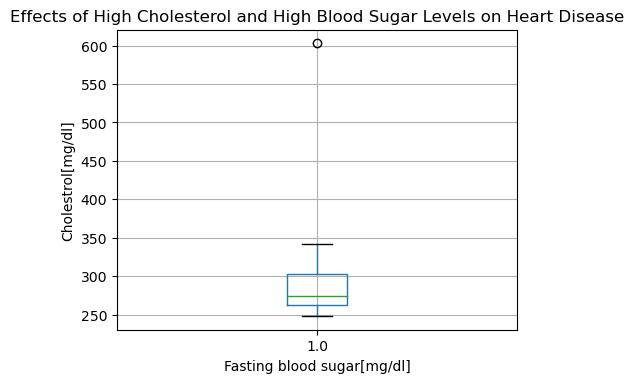

In [8]:
# Box plot graph displays Effects of High Cholesterol and High Blood Sugar Levels on Heart Disease
high_chol_fbs[['chol','fbs']].boxplot(by='fbs',figsize=(5,4))
plt.ylabel('Cholestrol[mg/dl]')
plt.xlabel('Fasting blood sugar[mg/dl]')
plt.title('Effects of High Cholesterol and High Blood Sugar Levels on Heart Disease')
plt.suptitle('')
plt.savefig('data/high_chol_fbs.png', bbox_inches='tight')
plt.show()

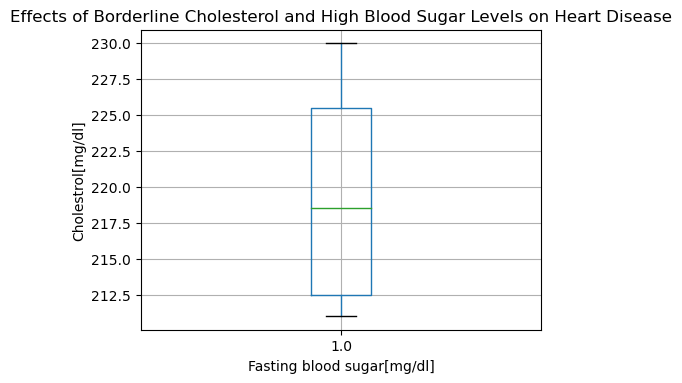

In [9]:
# Box plot graph displays Effects of Borderline Cholesterol and High Blood Sugar Levels on Heart Disease
brdrln_chol_fbs[['chol','fbs']].boxplot(by='fbs',figsize=(5,4))
plt.ylabel('Cholestrol[mg/dl]')
plt.xlabel('Fasting blood sugar[mg/dl]')
plt.title('Effects of Borderline Cholesterol and High Blood Sugar Levels on Heart Disease')
plt.suptitle('')
plt.savefig('data/brdrln_chol_fbs.png', bbox_inches='tight')
plt.show()

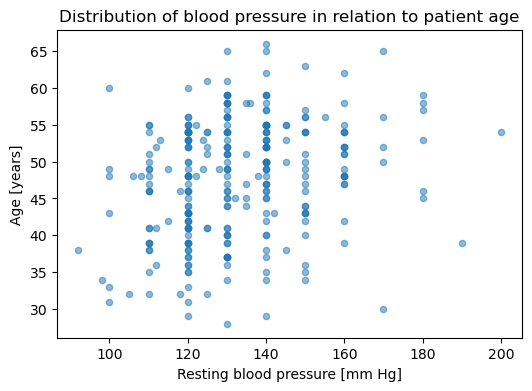

In [10]:
# scatter plot distribution of blood pressure in relation to patient age
df.plot.scatter('trestbps','age',figsize=(6,4), alpha=0.5, s=20) 
plt.xlabel('Resting blood pressure [mm Hg]')
plt.ylabel('Age [years]')
plt.title('Distribution of blood pressure in relation to patient age')
plt.show()

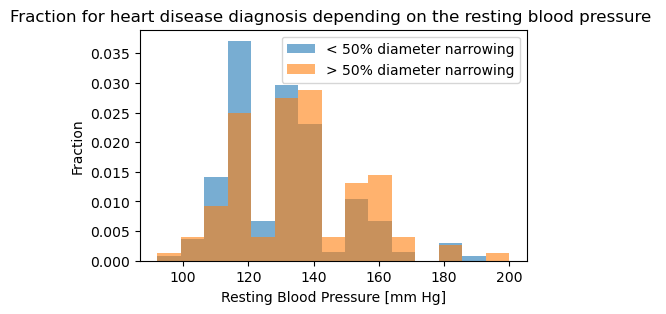

In [11]:
#Histogram to show heart disease diagnosis for patients depending on the resting blood pressure
categories = df['num       '].unique()
bin_range = (df['trestbps'].min(),df['trestbps'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['num       ']==c]['trestbps'],alpha=0.6,label=c,range=bin_range,bins=15,density=True)
plt.legend(['< 50% diameter narrowing','> 50% diameter narrowing'])
plt.ylabel('Fraction')
plt.xlabel('Resting Blood Pressure [mm Hg]')
plt.title('Fraction for heart disease diagnosis depending on the resting blood pressure ')
plt.show()

In [12]:
# Diagnosis of heart disease based on gender for patients aging 35 and more
df5 = (df[(df['age']>=35)&(df['sex']==0)&(df['num       ']==1.0)])
print('Male patients >= 35 years of age having a heart disease: ',df5.shape[0])
df6= (df[(df['age']>=35)&(df['sex']==1)&(df['num       ']==1.0)])
print('Female patients >= 35 years of age having a heart disease: ',df6.shape[0])
df7 = (df[(df['age']>=35)&(df['sex']==0)])
print('Male patients >= 35 years of age: ',df7.shape[0])
df8= (df[(df['age']>=35)&(df['sex']==1)])
print('Female patients >= 35 years of age: ',df8.shape[0])

Male patients >= 35 years of age having a heart disease:  11
Female patients >= 35 years of age having a heart disease:  91
Male patients >= 35 years of age:  76
Female patients >= 35 years of age:  202


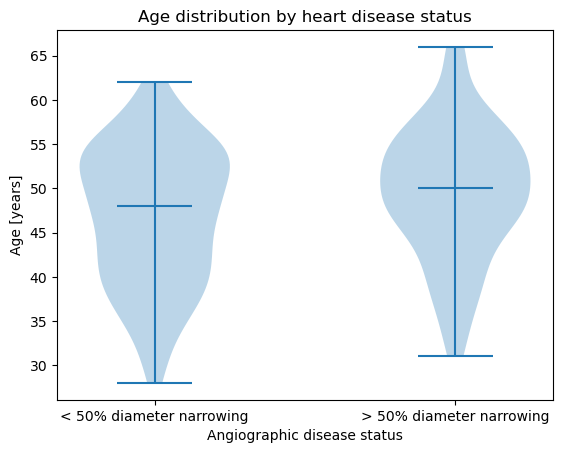

In [13]:
# Violin plot for Age distribution by heart disease status
age = df['age']
num = df['num       ']
# create the violin plot
plt.violinplot([age[num==0], age[num==1]], showmeans=False, showmedians=True)
plt.xticks([1, 2], ['< 50% diameter narrowing', '> 50% diameter narrowing'])
plt.xlabel('Angiographic disease status')
plt.ylabel('Age [years]')
plt.title('Age distribution by heart disease status')
plt.savefig('data/age distribution.png', bbox_inches='tight')
plt.show()

In [14]:
# Stacked bar plot for distribution of Chest Pain Types by Heart Disease Status
count_matrix = df.groupby(['cp','num       ']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

num          0   1
cp                
1            7   4
2           98   8
3           43  11
4           40  83
num                0         1
cp                            
1           0.636364  0.363636
2           0.924528  0.075472
3           0.796296  0.203704
4           0.325203  0.674797


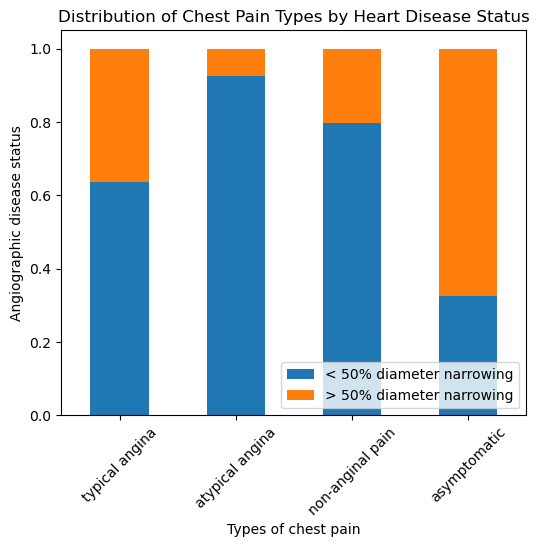

In [15]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(6,5))
plt.xlabel('Types of chest pain')
plt.ylabel('Angiographic disease status')
plt.title('Distribution of Chest Pain Types by Heart Disease Status')
plt.legend(['< 50% diameter narrowing','> 50% diameter narrowing'],loc=4)
plt.xticks([0, 1, 2, 3],['typical angina','atypical angina','non-anginal pain','asymptomatic'], rotation=45)
plt.savefig('data/chest pain.png', bbox_inches='tight')
plt.show()

**Scatter plot for age v/s Maximum heart rate achieved(thalach)**

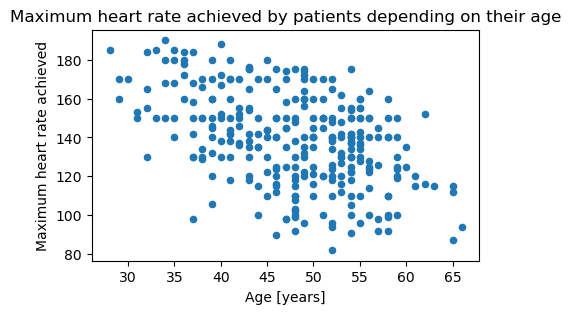

In [16]:
df.plot.scatter('age','thalach',figsize=(5,3), s=20) 
plt.xlabel('Age [years]')
plt.ylabel('Maximum heart rate achieved')
plt.title('Maximum heart rate achieved by patients depending on their age')
plt.show()

**2. Splitting the data**

In [17]:
y = df['num       ']
X = df.loc[:, df.columns != 'num       ']
print(y)
print(X.head())
# print(X)
df.columns

0      0
1      0
2      0
3      0
4      0
      ..
289    1
290    1
291    1
292    1
293    1
Name: num       , Length: 294, dtype: int64
   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   slope  ca  thal  
0    NaN NaN   NaN  
1    NaN NaN   NaN  
2    NaN NaN   NaN  
3    NaN NaN   6.0  
4    NaN NaN   NaN  


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [18]:
print(df['num       '].value_counts())

num       
0    188
1    106
Name: count, dtype: int64


**Stratified K-fold split**

In [19]:
from sklearn.model_selection import train_test_split 
random_state = 42

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

print('**balance without stratification:**')
# a variation on the order of 1% which would be too much for imbalanced data!
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
print('**balance with stratification:**')
# very little variation (in the 4th decimal point only) which is important if the problem is imbalanced
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))


**balance without stratification:**
(array([0, 1], dtype=int64), array([108,  68], dtype=int64))
(array([0, 1], dtype=int64), array([40, 19], dtype=int64))
(array([0, 1], dtype=int64), array([40, 19], dtype=int64))
**balance with stratification:**
(array([0, 1], dtype=int64), array([113,  63], dtype=int64))
(array([0, 1], dtype=int64), array([37, 22], dtype=int64))
(array([0, 1], dtype=int64), array([38, 21], dtype=int64))


In [20]:
from sklearn.model_selection import StratifiedKFold
random_state = 42

# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

test balance: (array([0, 1], dtype=int64), array([38, 21], dtype=int64))
new fold
(array([0, 1], dtype=int64), array([113,  63], dtype=int64))
(array([0, 1], dtype=int64), array([37, 22], dtype=int64))
new fold
(array([0, 1], dtype=int64), array([112,  64], dtype=int64))
(array([0, 1], dtype=int64), array([38, 21], dtype=int64))
new fold
(array([0, 1], dtype=int64), array([112,  64], dtype=int64))
(array([0, 1], dtype=int64), array([38, 21], dtype=int64))
new fold
(array([0, 1], dtype=int64), array([113,  64], dtype=int64))
(array([0, 1], dtype=int64), array([37, 21], dtype=int64))


In [21]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(177, 13)
(59, 13)
(58, 13)


**Missing data before preprocessing**

In [22]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (294, 14)
fraction of missing values in features:
trestbps    0.003401
chol        0.078231
fbs         0.027211
restecg     0.003401
thalach     0.003401
exang       0.003401
slope       0.646259
ca          0.989796
thal        0.904762
dtype: float64
data types of the features with missing values:
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
slope       float64
ca          float64
thal        float64
dtype: object
fraction of points with missing values: 0.9965986394557823


**Preprocessing the data**

In [35]:
cat_ftrs=['sex','fbs','exang','ca']

num_ftrs=['age','trestbps','chol','thalach','oldpeak','cp','restecg','slope','thal']

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

random_state = 30

# one-hot encoder
# We need to replace the NaN with a string first!
cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1)),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

# standard scaler
num_trans = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_ftrs),
        ('cat', cat_trans, cat_ftrs)])

In [37]:
X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names)
print(df_val.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

(177, 19)
(58, 19)
(59, 19)
['num__age' 'num__trestbps' 'num__chol' 'num__thalach' 'num__oldpeak'
 'num__cp' 'num__restecg' 'num__slope' 'num__thal' 'cat__sex_0.0'
 'cat__sex_1.0' 'cat__fbs_-1.0' 'cat__fbs_0.0' 'cat__fbs_1.0'
 'cat__exang_-1.0' 'cat__exang_0.0' 'cat__exang_1.0' 'cat__ca_-1.0'
 'cat__ca_0.0']


****Missing data after preprocessing****

In [38]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df_train[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (177, 19)
fraction of missing values in features:
num__trestbps    0.005650
num__chol        0.084746
num__thalach     0.005650
num__slope       0.610169
num__thal        0.903955
dtype: float64
data types of the features with missing values:
num__trestbps    float64
num__chol        float64
num__thalach     float64
num__slope       float64
num__thal        float64
dtype: object
fraction of points with missing values: 0.9548022598870056
